# <span style="color:maroon"> Data assimilation, machine learning and dynamical systems - Part I  </span>
#### Marc Bocquet¹ [marc.bocquet@enpc.fr](mailto:marc.bocquet@enpc.fr) and Julien Brajard² [julien.brajard@nersc.no](mailto:julien.brajard@nersc.no)
#### (1) CEREA, École des Ponts et EdF R&D, Île-de-France, France
#### (2) Nansen Center (NERSC), Bergen, Norway

During this session, we will discover some connections between data assimilation and deep learning when applied to dynamical systems.

#  <span style="color:teal"> Synopsis </span>

The goal of this lecture is to give a brief and very limited introduction to the connection between __machine learning/deep learning__ and __data assimilation__. Machine learning has found many new convincing applications over the past couple of years, besides computer vision or natural language. The geosciences are among them. Even within the geosciences, there is a considerable range of potential applications of machine learning and deep learning; some of them have been evidenced recently.

Our specific goal today will be to not only learn the state of a physical system through its observation and a prior of this state but also to correct its dynamics.This contrasts with traditional data assimilation where the model is usually assumed to be known, or corrected via only a bunch of parameters in the control variables. 

# <span style="color:teal"> Preambule: theoretical fundamentals and objective </span>

## <span style="color:blue"> Dynamical system and observation </span>

Let us consider a dynamical system which is observed:
\begin{align}
\mathbf{x}_{k} &= M_k(\mathbf{x}_{k-1}) + \eta_k, \\
\mathbf{y}_{k} &= H_k(\mathbf{x}_{k-1}) + \varepsilon_k
\end{align}
where $\mathbf{x}_k$ is the state vector at time $t_k$, $\mathbf{y}_k$ is the observation vector at time $t_k$,
$M_k$ is the numerical evolution model from time $t_{k-1}$ to time $t_k$, and $H_k$ is the observation operator. The noise vector $\varepsilon_k$ follows a Gaussian distribution and is meant to account for some of model error:
$\varepsilon_k \sim {\mathcal N}({\mathbf 0}, {\mathbf Q}_k)$. The noise vector $\eta_k$ follows a Gaussian distribution and is meant to account for observation error: $\eta_k \sim {\mathcal N}({\mathbf 0}, {\mathbf R}_k)$.

## <span style="color:blue"> Weak-constraint 4D-Var and generalisation </span>

Then the typical weak-constraint 4D-Var associated to this system is described by the cost function:
$$
J(\mathbf{x}_{0:K}) = - J_\mathrm{b}(\mathbf{x}_0) + \sum_{k=0}^K \|\mathbf{y}_k-\mathbf{H}_k \mathbf{x}_k \|^2_{\mathbf{R}_k^{-1}}+ \sum_{k=1}^K \|\mathbf{x}_k- M_k\left(\mathbf{x}_{k-1}\right) \|^2_{\mathbf{Q}_k^{-1}}, 
$$
where $J_\mathrm{b}$ is the prior/background term, the second term is departure from the observations, and the third term is the model error term which measures the departure from what the model $M_k$ would predict.
Now, we can widen the problem and assume the model is at least partly statistical on depend a vector of constant-in-time parameters 
$\boldsymbol{\omega}$ to be adjusted if not learned, i.e.:
$$
\mathbf{x}_{k} = M_k(\boldsymbol{\omega}, \mathbf{x}_{k-1}) + \eta_k .
$$
They could be physical parameters of the model, or weights and biases of a neural network correction to a physical model. The generalised cost function becomes:
$$
J(\boldsymbol{\omega}, \mathbf{x}_{0:K}) = - J_\mathrm{b}(\mathbf{x}_0) + \sum_{k=0}^K \|\mathbf{y}_k-\mathbf{H}_k \mathbf{x}_k \|^2_{\mathbf{R}_k^{-1}}+ \sum_{k=1}^K \|\mathbf{x}_k- M_k\left(\boldsymbol{\omega}, \mathbf{x}_{k-1}\right) \|^2_{\mathbf{Q}_k^{-1}}.
$$

## <span style="color:blue"> Combined data assimilation and machine learning </span>

### First step: data assimilation

Hence, we want to minimise this cost function both on the trajectory $\mathbf{x}_{0:K}$ and on the model statistical parameters. But they are very different in nature and quite difficult to minimise altogether. Hence we will split the task on first a data assimilation part focusing on $\mathbf{x}_k$, and then a machine learning task focusing on $\boldsymbol{\omega}$.
We first assime the model is of the form:
$$
M_k(\boldsymbol{\omega},\mathbf{x}_{k-1}) = \Phi(\mathbf{x}_{k-1}) + \mathrm{nn}_\boldsymbol{\omega}(\mathbf{x}_{k-1})
$$
where $\Phi$ is a known physical model, approximation of the true model and $\mathrm{nn}_\boldsymbol{\omega}$ 
is a neural network correction.
$$
J(\boldsymbol{\omega}, \color{red}{\mathbf{x}_{0:K}}) = - J_\mathrm{b}(\color{red}{\mathbf{x}_0})
+ \sum_{k=0}^K \|\mathbf{y}_k-\mathbf{H}_k \color{red}{\mathbf{x}_k} \|^2_{\mathbf{R}_k^{-1}}
+ \sum_{k=1}^K \| \color{red}{\mathbf{x}_k}- M_k\left(\boldsymbol{\omega}, \color{red}{\mathbf{x}_{k-1}}\right) \|^2_{\mathbf{Q}_k^{-1}}.
$$
At fixed $\boldsymbol{\omega}$, this is a smoothing data assimilation problem, which can be solved more or less acurately by any proper data assimilation method: 4D-Var, WC 4D-Var, EnKF, EnKS, IEnKS, etc.

### Second step: machine learning

Next, once a state trajectory $\mathbf{x}^\star_{0:K}$ has been obtained from data assimilation, one can focus on the machine learning problem and specifically $\boldsymbol{\omega}$:
$$
J(\color{red}{\boldsymbol{\omega}}, \mathbf{x}^\star_{0:K}) = - J_\mathrm{b}(\mathbf{x}^\star_0) + \sum_{k=0}^K \|\mathbf{y}_k-\mathbf{H}_k \mathbf{x}^\star_k \|^2_{\mathbf{R}_k^{-1}}+ \sum_{k=1}^K \| \mathbf{x}^\star_k - \Phi(\mathbf{x}^\star_{k-1}) - \mathrm{nn}_\color{red}{\boldsymbol{\omega}}(\mathbf{x}^\star_{k-1}) \|^2_{\mathbf{Q}_k^{-1}}.
$$
The output is a learned neural net $\mathrm{nn}_\boldsymbol{\omega^\star}$, and hence a correction of the hybrid physical/statistical model.


### Coordinate descent

Moreover, it can be shown that one can iterate those two steps, which is known as a coordinate descent, following the schematic:
<p align = "center">
<img src="./Figures/loop_daml.png" alt="Coordinate descent for DAML" width="800"/>
</p>
<p align = "center">
Fig.1 - Coordinate descent schematic for DAML.
</p>

# <span style="color:teal"> First step: consistent model trajectory through data assimilation </span>

## <span style="color:blue"> I. The Lorenz 1996 model </span>

The Lorenz 1996 (L96, [Lorenz and Emanuel 1998]) is a low-order chaotic model commonly used in data assimilation to asse the performance of new algorithms. It represents the evolution of some dynamical meteorological scalar variable over a latitude circle.

The model **dynamics** is driven by the following set of ordinary differential equations (ODEs):
$$
    \forall n \in [1, N_{\mathsf{x}}], \quad \frac{\mathrm{d}x_{n}}{\mathrm{d}t} =
    (x_{n+1}-x_{n-2})x_{n-1}-x_{n}+F,
$$
where the indices are periodic: $x_{-1}=x_{N_{\mathsf{x}}-1}$, $x_{0}=x_{N_{\mathsf{x}}}$, and $x_{1}=x_{N_{\mathsf{x}}+1}$, and where the system size $N_{\mathsf{x}}$ can take arbitrary values.

In the standard configuration, $N_{\mathsf{x}}=40$ and the forcing coefficient is $F=8$. The ODEs are integrated using a fourth-order Runge-Kutta scheme with a time step of $0.05$ model time unit (MTU). The resulting dynamics is **chaotic** with a doubling time of errors around $0.42$ MTU. For comparison, $0.05$ MTU represent six hours of real time and correspond to an average autocorrelation around $0.967$.
This model will be or apprimation of a band of atmosphere.

## <span style="color:blue"> II. Proxy model integration </span>

We now make an integration of the model to visualise a state trajectory (Hovmöller plot) of the L96 model.
We first import standard modules including tensorflow, graphical package and the model which is a numerical implementation of the above ODEs. Note that we have built it in Python/Keras/TensorFlow2.x.

In [1]:
# Import standard modules
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm.notebook import trange, tqdm
import pathlib

# Folder for results
dir = dict(output = pathlib.Path("./Output"))
dir['output'].mkdir(exist_ok=True)

# For plot customisation
sns.set_context('notebook')
sns.set_style('darkgrid')
plt.rc('axes', linewidth=1)
plt.rc('axes', edgecolor='k')
plt.rc('figure', dpi=100)
palette = sns.color_palette('deep')

# Import custom L96 model package
from Model.lorenz96 import l96

In [2]:
# set random seed
np.random.seed(314)

In the following cell, we define the parameter values of L96 which are taken from the original paper:
- the number of variables $N_{\mathsf{x}}$ is set to $N_{\mathsf{x}} =40$;
- the forcing coefficient $F$ is set to $F=8$;
- the integration time step is set to $dt=0.05$.

In this configuration, the model variability (spatial average of the time standard deviation per variable) is $3.64$, the doubling time is $0.42$ MTU and the Lyapunov time is $0.61$ MTU. These values will be used later to normalise our plots.

In [3]:
# Set the parameters of L96 and build the model
Nx = 40
dt = 0.05
F = 8
phi = l96(Nx, dt, F)
phi_stat = dict( model_mean = 2.22,
                 model_std = 3.73,
                 doubling_time = 0.42,
                 lyap_time = 0.61
               )

In the following cell, we perform a rather short model integration, in order to illustrate the model dynamics. The initial condition is a random field.

In [4]:
# Perform a short model integration (for plotting)
Nt_plot = 500
xt_plot = np.zeros((Nt_plot, Nx))
x = 3 + np.random.randn(Nx)
for t in trange(Nt_plot, desc='proxy model integration'):
    x += phi(x)
    xt_plot[t] = x
xt_init = x.copy()

proxy model integration:   0%|          | 0/500 [00:00<?, ?it/s]

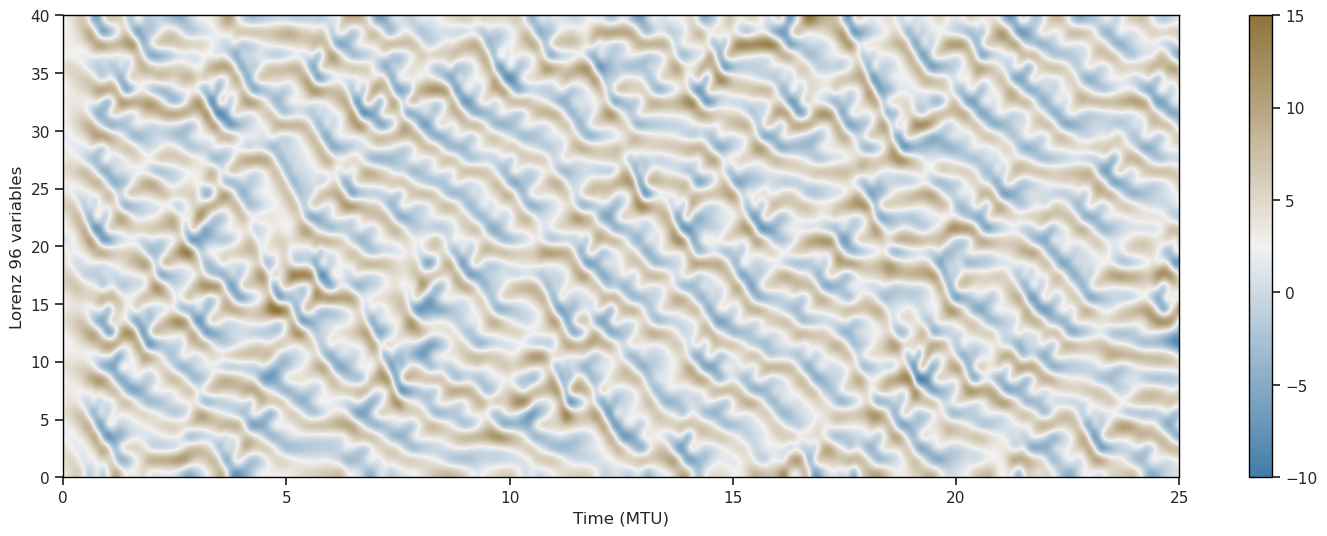

In [5]:
# Plot model integration
fig = plt.figure(figsize=(18, 6))
plt.grid(False)
im = plt.imshow(xt_plot.T, 
           aspect = 'auto',
           origin = 'lower',
           interpolation = 'spline36',
           cmap = sns.diverging_palette(240, 60, as_cmap=True),
           extent = [0, dt*xt_plot.shape[0], 0, Nx],
           vmin = -10,
           vmax = 15)
plt.colorbar(im)
plt.xlabel('Time (MTU)')
plt.ylabel('Lorenz 96 variables')
plt.tick_params(direction='out', left=True, bottom=True)
plt.show()

## <span style="color:blue"> III. True model definition </span>

Here, we consider the simple L96 model as an approximation of a more complex model, the true model, which can only be sparsely and noisily observed. We have devised a non-trivial model for this MOOC whose approximation could be L96. We wanted to avoid employing a true model where only a few parameters of L96 are changed, since this can be very easily learned by traditional data assimilation.

These true model dynamics are driven by the following set of ordinary differential equations (ODEs):
$$
    \forall n \in [1, N_{\mathsf{x}}], \quad \frac{\mathrm{d}x_{n}}{\mathrm{d}t} =
    (x_{n+1}-x_{n-2})x_{n-1} + \nu \left\{ x_{n+1}x_{n-1}(x_{n+2}-x_{n-2}) - x_{n+2}x_n(x_{n+3}-x_{n-1})\right\}
    - \lambda x_{n} +  F,
$$
where the indices are periodic: $x_{-1}=x_{N_{\mathsf{x}}-1}$, $x_{0}=x_{N_{\mathsf{x}}}$, and $x_{1}=x_{N_{\mathsf{x}}+1}$, and where the system size $N_{\mathsf{x}}=40$.

Moreover:
- the forcing coefficient is chosen to be $F=8.5$ as opposed to $8$ in L96;
- the friction coefficient is $\lambda=1.1$ as opposed to $1$ in L96;
- there is an additional cubic term compared to L96 in the tendencies, controlled by the $\nu$ parameter. This term (i) is second-order as in the sense that it is asymptotically consistent with a term of the form $x (\partial x)^2$ (ii) and it conserves energy $\sum_{n=1}^{N_\mathsf{x}} x_n^2$. Depending on the sign of $\nu$, it could soften or stiffen the L96 model. We choose $\nu=0.01$, whose value corresponds to a smoother generalisation of L96.

Like for the L96 model, these ODEs are integrated using a fourth-order Runge-Kutta scheme with a time step of $0.05$ model time unit (MTU). The resulting dynamics is **chaotic** with a doubling time of errors around $0.54$ MTU.

In [6]:
# import custom avection model package
from Model.lorenz96_cubic import l96cb

# Define the proxy model with non standard values and linear advection rather than convection
Nx = 40
dt = 0.05
F = 8.5
diffusion = 0.025
friction = 1.1
tmodel = l96cb(Nx, dt, F, diffusion, friction)

# perform a short model integration (for plotting)
Nt_plot = 500
xt_plot = np.zeros((Nt_plot, Nx))
x = xt_init.copy()
for t in trange(Nt_plot, desc='true model integration'):
    x += tmodel(x)
    xt_plot[t] = x

true model integration:   0%|          | 0/500 [00:00<?, ?it/s]

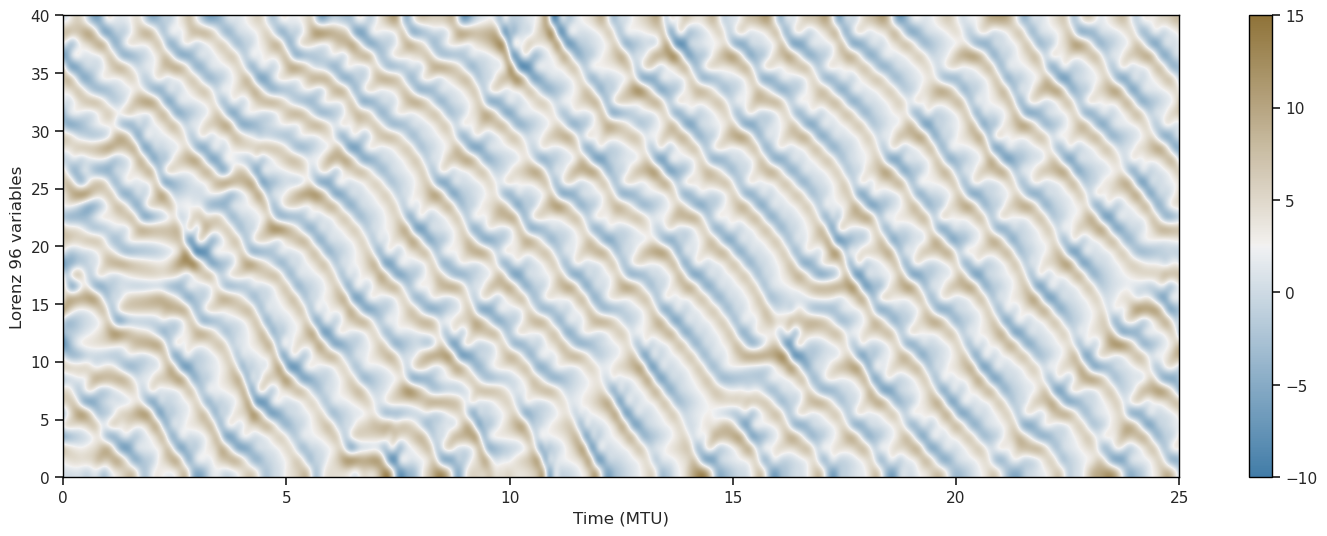

In [7]:
# plot model integration
fig = plt.figure(figsize=(18, 6))
plt.grid(False)
im = plt.imshow(xt_plot.T, 
           aspect = 'auto',
           origin = 'lower',
           interpolation = 'spline36',
           cmap = sns.diverging_palette(240, 60, as_cmap=True),
           extent = [0, dt*xt_plot.shape[0], 0, Nx],
           vmin = -10,
           vmax = 15)
plt.colorbar(im)
plt.xlabel('Time (MTU)')
plt.ylabel('Lorenz 96 variables')
plt.tick_params(direction='out', left=True, bottom=True)
plt.show()

For those of you interested in the long-term dynamical properties of this model compared to the L96, we can compute and plot the Lyapunov spectra of both mode on the same figure for comparison. We observe from both the Hovmöller plot and from its Lyapunov spectrum that indeed the true model aith the chosen parameter values is a slightly less unstable and smoother than L96.

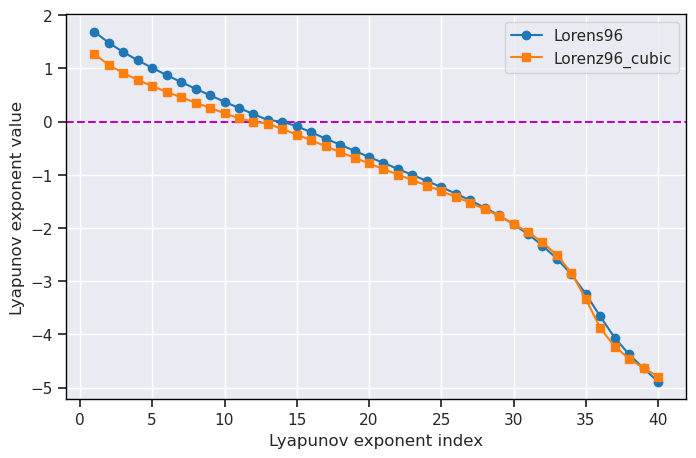

In [8]:
from LyapunovSpectrum.lyaspec import load
index, l96_lyaspec = load('l96_lyaspec.dat')
index, l96cb_lyaspec = load('l96cb_lyaspec.dat')
fig = plt.figure(figsize=(8, 5))
plt.axhline(y=0, color='m', linestyle='dashed')
plt.plot(index, l96_lyaspec, marker="o", label='Lorens96')
plt.plot(index, l96cb_lyaspec, marker="s", label='Lorenz96_cubic')
plt.legend()
plt.xlabel('Lyapunov exponent index')
plt.ylabel('Lyapunov exponent value')
plt.tick_params(direction='out', left=True, bottom=True)
plt.show()

Some statistics of this model can be computed, for comparison to the L96 model and for nornmalisation purposes:

In [9]:
truth_stat = dict( model_mean = 2.10,
                   model_std = 3.32,
                   doubling_time = 0.54,
                   lyap_time = 0.79
                  )

## <span style="color:blue"> IV. Database of observations </span>

Let us first compute a long trajectory of the truth which will be key to our synthetic experiment.
It is saved but it will only be accessible through observation.

In [10]:
# Compute the truth trajectory
Nt = 5000
xt = np.zeros((Nt, Nx), dtype=np.float32)
dates = np.array(range(Nt), dtype=int)
x = xt_init.copy()
for t in trange(Nt, desc='true model integration'):
    x += tmodel(x)
    xt[t] = x
with open(dir['output']/'xt.npy', 'wb') as file:
    np.save(file, xt)
with open(dir['output']/'dates.npy', 'wb') as file:
    np.save(file, dates)

true model integration:   0%|          | 0/5000 [00:00<?, ?it/s]

In the data assimilation run, only observations of this trajectory will be generated.
To match more realistic conditions, we only observe one every two grid points, and these scalar observations are noisy. Moreover, from one observation time to the next, these grid points are shifted by one grid cell.
Hence, the observation mask in space and time follows a checkerboard pattern. 
For the sake of simplicity, $N_\mathsf{x}$ is assumed even in the following so that one have the same number of observation at each date, i.e. $N_\mathsf{y}=N_\mathsf{x}/2$.

We add a normal i.i.d observation perturbation to each scalar observation, so that
$\mathbf{R}_k = \sigma_\mathrm{obs}^2 \mathbf{I}_{N_\mathsf{x}}$, with
- $\sigma_\mathrm{obs}=0.5$.

Let us now compute and save this observational database extracted from the trajectory of the true model.

In [11]:
# Build the observation operator
from DataAssimilation.observation import checkerboard
H = checkerboard(Nx)

# Compute the observation database
Ny = H.Ny[0]
sig_obs = 0.2
yp = np.empty((Nt, Ny), dtype=np.float32)
for t in trange(Nt, desc='generating observations'):
    yp[t] = H(xt[t], t) + np.random.normal(0, sig_obs, Ny)
with open(dir['output']/'yp.npy', 'wb') as file:
    np.save(file, yp)

generating observations:   0%|          | 0/5000 [00:00<?, ?it/s]

At this point, we have at our disposal, a noisy and sparse observational database of the truth $\mathbf{y}_\mathsf{p}$ on the one hand, and an approximation of the true model $\Phi$ on the other hand. The goal is to learn the full dynamics of this physical system. Hence, we want to apply the very first step of our combined DA+ML algorithm.

The first step is to apply data assimilation with the goal to reconstruct a full field of the system.
The second step, in part II of this MOOC, will apply machine learning to this reconstructed full field.

## <span style="color:blue"> IV. Data assimilation with an ensemble Kalman filter </span>

The data assimilation method that we choose is a deterministic EnKF, the ensemble transform Kalman filter (ETKF, [Hunt et al 2007]) to the problem, with an ensemble choosen to be $N_\mathrm{e}=40$ to avoid the need for localisation, only for the sake of simplicity (see for generalisations with localisation).

A gentle introduction to the ETKF at a master level can be found in chapter 5 of http://cerea.enpc.fr/HomePages/bocquet/teaching/assim-mb-en.pdf.

We assume that we know the observation error statistics, in particular $\sigma_\mathrm{obs}=0.5$.

In addition, we incorporate in the scheme a way to account for model error, i.e. the fact that $\Phi$ is an approximation of the true dynamics. In the absence of such scheme, the EnKF would diverge, being overconfident in its estimation of the source of errors.

This is achieved by
- the SQRT-CORE scheme [Raanes et al, 2015] with the simplest i.i.d. assumption: $\mathbf{Q}_k = \sigma_q^2 \mathrm{I}$; We choose to use $\sigma_q^2=0.15 \, dt$.
- and via a state-of-the-art adaptive inflation scheme [Raanes et al, 2019].

This just tells the EnKF to be cautious about its estimation of uncertainty and apply a margin of error to be on the safer side, and hence avoid divergence of the EnKF.


In [15]:
from DataAssimilation.enkf_call import call
Ne = 40
sig_q = np.sqrt(0.15*dt)
Nt = yp.shape[0]
Nts = 0
sig_x = 0.1
infl = 1

models = (phi, xt, H, yp, dates)
params = (Nx, dt, Nt, Nts, Ne, sig_obs, sig_x, sig_q, infl)

print("> run")
xa, rmse_mean, spread_mean, rmsei_mean, zeta_mean, wctime, prtime = call(models, params, dir)
print("> wctime(s)", wctime, " prtime(s)", prtime)
print("> rmse_mean", rmse_mean, "spread_mean", spread_mean, "rmsei_mean", rmsei_mean)
print("> zeta_mean", zeta_mean)

# Save the analysis trajectory
with open(dir['output']/'xa.npy', 'wb') as file:
    np.save(file, xa)

> run
> generate ensemble
> data assimilation run


running EnKF:   0%|          | 0/5000 [00:00<?, ?it/s]

> wctime(s) 6.836696022000069  prtime(s) 6.848293025
> rmse_mean 0.17582747066020968 spread_mean 0.17628641035411316 rmsei_mean 2.132658954340815
> zeta_mean 29.825891823032784


Because this is a twin experiment, it is possible to check how close to the true full trajectory is the analysed trajectory. The root mean square error (RMSE) between the analysis and the truth should be about $0.54$, well below the observation error of $1$ at only one every two grid points.

Within the data assimilation run, there was also an estimation of the error made by a cubic interpolation over the ungauged grid points. The RMSE for all sites as compared to the truth should be about $2.71$, and slightly below $1$ for the observed grid points, as expected. 

$\overline{\zeta} \approx 25$ is a measure of the effective size of the ensemble as diagnosed by our adaptive hybrid EnKF-N scheme.

## <span style="color:blue"> V. Provisional conclusion, on our way to part II  </span>

Hence, it is clear that the data assimilation run is worth using. Note that we have not used any smoother, which could have be more complex but also more accurate. 

We can now convey the analysis trajectory to the machine learning step, which is part II of our MOOC.
All the necessary fields are stored in "./Ouput".